# <font color='red'> Spoken Digit Recognition</font>


In this notebook, You will do Spoken Digit Recognition. 

Input - speech signal, output - digit number



It contains  

1. Reading the dataset. and Preprocess the data set. Detailed instrctions are given below. You have to write the code in the same cell which contains the instrction. 
2. Training the LSTM with RAW data
3. Converting to spectrogram and Training the LSTM network
4. Creating the augmented data and doing step 2 and 3 again.  

<font size=5>Instructions:</font>

    1. Don't change any Grader Functions. Don't manipulate any Grader functions. If you manipulate any, it will be considered as plagiarised. 
    
    2. Please read the instructions on the code cells and markdown cells. We will explain what to write. 
    
    3. Please return outputs in the same format what we asked. Eg. Don't return List of we are asking for a numpy array.
    
    4. Please read the external links that we are given so that you will learn the concept behind the code that you are writing.
    
    5. We are giving instructions at each section if necessary, please follow them. 

<font size=5>Every Grader function has to return True. </font>



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import librosa
import os
import pickle
##if you need any imports you can do that here. 

We shared recordings.zip, please unzip those. 

In [27]:
#read the all file names in the recordings folder given by us
#(if you get entire path, it is very useful in future)
#save those files names as list in "all_files"
!gdown 17YGQheavMbM6aeHYjUcGssXfb7eQHo1z
#https://drive.google.com/file/d/17YGQheavMbM6aeHYjUcGssXfb7eQHo1z/view?usp=share_link
!unzip recordings.zip

Downloading...
From: https://drive.google.com/uc?id=17YGQheavMbM6aeHYjUcGssXfb7eQHo1z
To: /content/recordings.zip
100% 9.28M/9.28M [00:01<00:00, 6.30MB/s]
Archive:  recordings.zip
   creating: recordings/
  inflating: recordings/0_jackson_0.wav  
  inflating: recordings/0_jackson_1.wav  
  inflating: recordings/0_jackson_10.wav  
  inflating: recordings/0_jackson_11.wav  
  inflating: recordings/0_jackson_12.wav  
  inflating: recordings/0_jackson_13.wav  
  inflating: recordings/0_jackson_14.wav  
  inflating: recordings/0_jackson_15.wav  
  inflating: recordings/0_jackson_16.wav  
  inflating: recordings/0_jackson_17.wav  
  inflating: recordings/0_jackson_18.wav  
  inflating: recordings/0_jackson_19.wav  
  inflating: recordings/0_jackson_2.wav  
  inflating: recordings/0_jackson_20.wav  
  inflating: recordings/0_jackson_21.wav  
  inflating: recordings/0_jackson_22.wav  
  inflating: recordings/0_jackson_23.wav  
  inflating: recordings/0_jackson_24.wav  
  inflating: recordings/

In [ ]:
all_files=['recordings/'+ i for i in os.listdir('recordings')]

<font size=4>Grader function 1 </font>

In [ ]:
def grader_files():
    temp = len(all_files)==2000
    temp1 = all([x[-3:]=="wav" for x in all_files])
    temp = temp and temp1
    return temp
grader_files()

True

Create a dataframe(name=df_audio) with two columns(path, label).   
You can get the label from the first letter of name.  
Eg: 0_jackson_0 --> 0  
0_jackson_43 --> 0

## Exploring the sound dataset

In [ ]:
#It is a good programming practise to explore the dataset that you are dealing with. This dataset is unique in itself because it has sounds as input
#https://colab.research.google.com/github/Tyler-Hilbert/AudioProcessingInPythonWorkshop/blob/master/AudioProcessingInPython.ipynb
#visualize the data and write code to play 2-3 sound samples in the notebook for better understanding.
#please go through the following reference video https://www.youtube.com/watch?v=37zCgCdV468

In [ ]:
from IPython.display import Audio
a, b=librosa.load(all_files[0])
Audio(data=a, rate=b)

## Creating dataframe

In [ ]:
#Create a dataframe(name=df_audio) with two columns(path, label).   
#You can get the label from the first letter of name.  
#Eg: 0_jackson_0 --> 0  
#0_jackson_43 --> 0
from tqdm import tqdm
path=[]
labels=[]
for file_name in tqdm(os.listdir('recordings')):
  path.append('recordings/'+file_name)
  l=file_name.split('_')[0]
  labels.append(l)

df_audio=pd.DataFrame()
df_audio['path']=path
df_audio['label']=labels

100%|██████████| 2000/2000 [00:00<00:00, 785670.88it/s]


In [ ]:
#info
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2000 non-null   object
 1   label   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


<font size=4>Grader function 2 </font>

In [ ]:
def grader_df():
    flag_shape = df_audio.shape==(2000,2)
    flag_columns = all(df_audio.columns==['path', 'label'])
    list_values = list(df_audio.label.value_counts())
    flag_label = len(list_values)==10
    flag_label2 = all([i==200 for i in list_values])
    final_flag = flag_shape and flag_columns and flag_label and flag_label2
    return final_flag
grader_df()

True

In [ ]:
from sklearn.utils import shuffle
df_audio = shuffle(df_audio, random_state=33)#don't change the random state

**Pickle File 1**

In [4]:
import pickle
'''f=open('/content/drive/MyDrive/speech_recognition/df_audio.pkl','wb')
pickle.dump(df_audio, f)'''

f=open('/content/drive/MyDrive/speech_recognition/df_audio.pkl','rb')
df_audio=pickle.load(f)

<pre><font size=4>Train and Validation split</font></pre>

In [ ]:
#split the data into train and validation and save in X_train, X_test, y_train, y_test
#use stratify sampling
#use random state of 45
#use test size of 30%
from sklearn.model_selection import train_test_split
x=df_audio['path']
y=df_audio['label']
X_train, X_test, y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=45, stratify=y)


**Pickle File 2**

In [11]:
'''f=open('/content/drive/MyDrive/speech_recognition/x_y_split_data.pkl','wb')
pickle.dump([X_train, X_test, y_train,y_test],f)
f.close()'''

f=open('/content/drive/MyDrive/speech_recognition/x_y_split_data.pkl','rb')
[X_train, X_test, y_train,y_test]=pickle.load(f)

<font size=4>Grader function 3 </font>

In [ ]:
def grader_split():
    flag_len = (len(X_train)==1400) and (len(X_test)==600) and (len(y_train)==1400) and (len(y_test)==600)
    values_ytrain = list(y_train.value_counts())
    flag_ytrain = (len(values_ytrain)==10) and (all([i==140 for i in values_ytrain]))
    values_ytest = list(y_test.value_counts())
    flag_ytest = (len(values_ytest)==10) and (all([i==60 for i in values_ytest]))
    final_flag = flag_len and flag_ytrain and flag_ytest
    return final_flag
grader_split()

True

<pre><font size=4>Preprocessing</font>

All files are in the "WAV" format. We will read those raw data files using the librosa</pre>

In [ ]:
sample_rate = 22050
def load_wav(x, get_duration=True):
    '''This return the array values of audio with sampling rate of 22050 and Duration'''
    #loading the wav file with sampling rate of 22050
    samples, sample_rate = librosa.load(x, sr=22050)
    if get_duration:
        duration = librosa.get_duration(samples, sample_rate)
        return [samples, duration]
    else:
        return samples

In [ ]:
#use load_wav function that was written above to get every wave. 
#save it in X_train_processed and X_test_processed
# X_train_processed/X_test_processed should be dataframes with two columns(raw_data, duration) with same index of X_train/y_train
X_train_processed=pd.DataFrame()
X_test_processed=pd.DataFrame()

X_train_processed[['raw_data','duration']]=[(j[0],j[1]) for j in X_train.apply(load_wav)]
X_test_processed[['raw_data','duration']]=[(j[0],j[1]) for j in X_test.apply(load_wav)]

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


Text(0.5, 1.0, 'Histogram of Duration for Train Data')

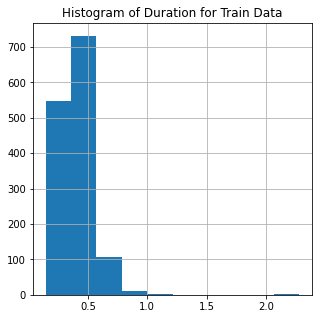

In [ ]:
#plot the histogram of the duration for trian
import matplotlib.pyplot as plt
X_train_processed['duration'].hist(figsize=(5,5))
plt.title('Histogram of Duration for Train Data')

Text(0.5, 1.0, 'Histogram of Duration for Test Data')

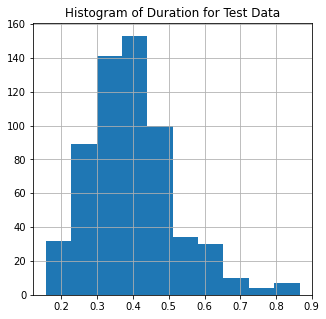

In [ ]:
#plot the histogram of the duration for trian
X_test_processed['duration'].hist(figsize=(5,5))
plt.title('Histogram of Duration for Test Data')

In [ ]:
#print 0 to 100 percentile values with step size of 10 for train data duration. 
for i in range(0,101,10):
  print('{} percentile values is {}'.format(i,np.percentile(X_train_processed['duration'].values,i)))

0 percentile values is 0.1435374149659864
10 percentile values is 0.26312925170068024
20 percentile values is 0.30108843537414964
30 percentile values is 0.33240816326530614
40 percentile values is 0.3593560090702948
50 percentile values is 0.3897052154195011
60 percentile values is 0.4176145124716553
70 percentile values is 0.44988662131519275
80 percentile values is 0.48835374149659866
90 percentile values is 0.5557097505668934
100 percentile values is 2.282766439909297


In [ ]:
##print 90 to 100 percentile values with step size of 1. 
for i in range(90,101,1):
  print('{} percentile values is {}'.format(i,np.percentile(X_train_processed['duration'].values,i)))

90 percentile values is 0.5557097505668934
91 percentile values is 0.5669832199546486
92 percentile values is 0.5787410430839004
93 percentile values is 0.5933292517006804
94 percentile values is 0.6102702947845804
95 percentile values is 0.6230884353741496
96 percentile values is 0.6430421768707484
97 percentile values is 0.658566439909297
98 percentile values is 0.6883972789115647
99 percentile values is 0.7930458049886622
100 percentile values is 2.282766439909297


<font size=4>Grader function 4 </font>

In [ ]:
def grader_processed():
    flag_columns = (all(X_train_processed.columns==['raw_data', 'duration'])) and (all(X_test_processed.columns==['raw_data', 'duration']))
    flag_shape = (X_train_processed.shape ==(1400, 2)) and (X_test_processed.shape==(600,2))
    return flag_columns and flag_shape
grader_processed()

True

<b>Based on our analysis 99 percentile values are less than 0.8sec so we will limit maximum length of X_train_processed and X_test_processed to 0.8 sec. It is similar to pad_sequence for a text dataset.</b>

<b>While loading the audio files, we are using sampling rate of 22050 so one sec will give array of length 22050. so, our maximum length is 0.8*22050 = 17640
</b>
<b>Pad with Zero if length of sequence is less than 17640 else Truncate the number. </b>

<b> Also create a masking vector for train and test. </b>

<b> masking vector value = 1 if it is real value, 0 if it is pad value. Masking vector data type must be bool.</b>


In [ ]:
max_length  = 17640
## as discussed above, Pad with Zero if length of sequence is less than 17640 else Truncate the number. 
## save in the X_train_pad_seq, X_test_pad_seq
## also Create masking vector X_train_mask, X_test_mask

## all the X_train_pad_seq, X_test_pad_seq, X_train_mask, X_test_mask will be numpy arrays mask vector dtype must be bool.

X_train_processed['raw_data']

def processor(a):
  if len(a)>=max_length:
    b=a[:max_length]
    c=np.array([1 for i in range(max_length)])
  elif len(a)<max_length:
    b=np.append(a,[0 for i in range(max_length-len(a))])
    c=np.append([1 for i in range(len(a))],[0 for i in range(max_length-len(a))])
  return b,c
X_test_p=pd.DataFrame()
X_train_p=pd.DataFrame()

X_train_p[['processed','mask']]=[(j[0],j[1]) for j in X_train_processed['raw_data'].apply(processor)]
X_test_p[['processed','mask']]=[(j[0],j[1]) for j in X_test_processed['raw_data'].apply(processor)]

X_train_pad_seq=np.array(X_train_p['processed'].tolist())
X_test_pad_seq=np.array(X_test_p['processed'].tolist())
X_train_mask=np.array(X_train_p['mask'].tolist()).astype('bool')
X_test_mask=np.array(X_test_p['mask'].tolist()).astype('bool')

**Pickle File 3**

In [5]:
'''f=open('/content/drive/MyDrive/speech_recognition/padded_data.pkl', 'wb')
pickle.dump([X_train_pad_seq,X_test_pad_seq,X_train_mask,X_test_mask],f)
f.close()'''

f=open('/content/drive/MyDrive/speech_recognition/padded_data.pkl', 'rb')
[X_train_pad_seq,X_test_pad_seq,X_train_mask,X_test_mask]=pickle.load(f)

In [ ]:
X_train_mask

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

<font size=4>Grader function 5 </font>

In [ ]:
def grader_padoutput():
    flag_padshape = (X_train_pad_seq.shape==(1400, 17640)) and (X_test_pad_seq.shape==(600, 17640)) and (y_train.shape==(1400,))
    flag_maskshape = (X_train_mask.shape==(1400, 17640)) and (X_test_mask.shape==(600, 17640)) and (y_test.shape==(600,))
    flag_dtype = (X_train_mask.dtype==bool) and (X_test_mask.dtype==bool)
    return flag_padshape and flag_maskshape and flag_dtype
grader_padoutput()

True

### 1. Giving Raw data directly. 


Now we have

Train data: X_train_pad_seq, X_train_mask and y_train  
Test data: X_test_pad_seq, X_test_mask and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_pad_seq" as input, "X_train_mask" as mask input. You can use any number of LSTM cells. Please read LSTM documentation(https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) in tensorflow to know more about mask and also https://www.tensorflow.org/guide/keras/masking_and_padding 
2. Get the final output of the LSTM and give it to Dense layer of any size and then give it to Dense layer of size 10(because we have 10 outputs) and then compile with the sparse categorical cross entropy( because we are not converting it to one hot vectors). Also check the datatype of class labels(y_values) and make sure that you convert your class labels  to integer datatype before fitting in the model.
3. While defining your model make sure that you pass both the input layer and mask input layer as input to lstm layer as follows
<img src='https://i.imgur.com/FvcgvbY.jpg'>
4. Use tensorboard to plot the graphs of loss and metric(use custom micro F1 score as metric) and histograms of gradients. You can write your code for computing F1 score using this <a  href='https://i.imgur.com/8YULUcu.jpg'>link</a> 

5. make sure that it won't overfit. 
6. You are free to include any regularization


In [6]:
final_x_train=X_train_pad_seq[:,:,np.newaxis]
final_x_test=X_test_pad_seq[:,:,np.newaxis]


In [1]:
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Flatten, Embedding
from tensorflow.keras.models import Model
import tensorflow as tf


In [6]:
%load_ext tensorboard
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='logs/model_1')
logs='logs/model_1'
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 11920), started 0:37:53 ago. (Use '!kill 11920' to kill it.)

In [8]:
from sklearn.metrics import f1_score
import tensorflow as tf

def f1(y_true, y_pred):
  score=f1_score(y_true, np.argmax(np.asarray(y_pred), axis=1), average='macro')
  return score

def F1_score(y_true, y_pred):
  return tf.py_function(f1,(y_true, y_pred),tf.double)

In [4]:
## as discussed above, please write the architecture of the model.
## you will have two input layers in your model (data input layer and mask input layer)
## make sure that you have defined the data type of masking layer as bool
class model_1(Model):
  def __init__(self, lstm_unit_1,dense_unit_1):
    super().__init__()
    self.lstm_layer_1=LSTM(lstm_unit_1, return_sequences=True)

    self.dense_layer_1=Dense(dense_unit_1, activation='relu', kernel_initializer='he_normal')
    self.softmax=Dense(10,'softmax',kernel_initializer = 'glorot_normal')
    self.flatten_layer=Flatten()

  def call(self, inputs):
    input_data, mask_data=inputs[0], inputs[1]
    output=self.lstm_layer_1(input_data, mask=mask_data)
    output=self.flatten_layer(output)
    output=self.dense_layer_1(output)
    final_output=self.softmax(output)
    return final_output


tensorboard=tf.keras.callbacks.TensorBoard(log_dir='logs/model_1')
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath='model_1/model_1.tf', monitor='val_F1_score',save_best_only=True,mode= 'min',save_weights_only=True)
lr_rate=tf.keras.callbacks.ReduceLROnPlateau(patience=10,min_delta=0.001)
stopping=tf.keras.callbacks.EarlyStopping(min_delta=0.01, patience=3)
callbacks=[tensorboard,checkpoint,lr_rate,stopping]
m1=model_1(25,50)

In [12]:
m1.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='sparse_categorical_crossentropy', metrics=['accuracy',F1_score])
m1.fit([final_x_train,X_train_mask],y_train.values.astype('int'), epochs=50, validation_split=0.2, callbacks=callbacks, batch_size=16 )

Epoch 1/50
70/70 [==============================] - 40s 416ms/step - loss: 2.2661 - accuracy: 0.1518 - F1_score: 0.0990 - val_loss: 2.2987 - val_accuracy: 0.1571 - val_F1_score: 0.1049 - lr: 0.0010
Epoch 2/50
70/70 [==============================] - 28s 398ms/step - loss: 1.9194 - accuracy: 0.2946 - F1_score: 0.2411 - val_loss: 2.2966 - val_accuracy: 0.1964 - val_F1_score: 0.1497 - lr: 0.0010
Epoch 3/50
70/70 [==============================] - 41s 586ms/step - loss: 1.6525 - accuracy: 0.4107 - F1_score: 0.3380 - val_loss: 2.3754 - val_accuracy: 0.2179 - val_F1_score: 0.1500 - lr: 0.0010
Epoch 4/50
70/70 [==============================] - 26s 367ms/step - loss: 1.3719 - accuracy: 0.5232 - F1_score: 0.4504 - val_loss: 2.7019 - val_accuracy: 0.1893 - val_F1_score: 0.1420 - lr: 0.0010


In [13]:
#train your model
m1.evaluate([final_x_test,X_test_mask],y_test.values.astype('float32'), batch_size=1)

600/600 [==============================] - 64s 105ms/step - loss: 2.5871 - accuracy: 0.2033 - F1_score: 0.2033


[2.587127923965454, 0.20333333313465118, 0.20333333313465118]

### 2. Converting into spectrogram and giving spectrogram data as input  

We can use librosa to convert raw data into spectrogram. A spectrogram shows the features in a two-dimensional representation with the
intensity of a frequency at a point in time i.e we are converting Time domain to frequency domain. you can read more about this in https://pnsn.org/spectrograms/what-is-a-spectrogram


In [ ]:
def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    #print(type(raw_data))
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [ ]:
##use convert_to_spectrogram and convert every raw sequence in X_train_pad_seq and X_test_pad-seq.
## save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)
X_train_spectrogram=np.array([convert_to_spectrogram(i) for i in X_train_pad_seq])
X_test_spectrogram=np.array([convert_to_spectrogram(i) for i in X_test_pad_seq])

**Pickle File 4**

In [14]:
'''f=open('/content/drive/MyDrive/speech_recognition/spectrogram_data.pkl', 'wb')
pickle.dump([X_train_spectrogram,X_test_spectrogram],f)
f.close()'''

f=open('/content/drive/MyDrive/speech_recognition/spectrogram_data.pkl', 'rb')
[X_train_spectrogram,X_test_spectrogram]=pickle.load(f)

<font size=4>Grader function 6 </font>

In [ ]:
def grader_spectrogram():
    flag_shape = (X_train_spectrogram.shape==(1400,64, 35)) and (X_test_spectrogram.shape == (600, 64, 35))
    return flag_shape
grader_spectrogram()

True


Now we have

Train data: X_train_spectrogram and y_train  
Test data: X_test_spectrogram and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_spectrogram" as input and has to return output at every time step. 
2. Average the output of every time step and give this to the Dense layer of any size. 
(ex: Output from LSTM will be  (None, time_steps, features) average the output of every time step i.e, you should get (None,time_steps) 
and then pass to dense layer )
3. give the above output to Dense layer of size 10( output layer) and train the network with sparse categorical cross entropy.  
4. Use tensorboard to plot the graphs of loss and metric(use custom micro F1 score as metric) and histograms of gradients. You can write your code for computing F1 score using this <a  href='https://i.imgur.com/8YULUcu.jpg'>link</a> 
5. make sure that it won't overfit. 
6. You are free to include any regularization


In [15]:
# write the architecture of the model
#print model.summary and make sure that it is following point 2 mentioned above
class model_2(Model):
  def __init__(self,lstm_unit_1,dense_unit_1):
    super().__init__()
    self.lstm_layer_1=LSTM(lstm_unit_1 ,return_sequences=True)

    self.dense_layer_1=Dense(dense_unit_1, activation='relu', kernel_initializer='he_normal')
    self.softmax=Dense(10,'softmax')
    self.flatten_layer=Flatten()

  def call(self, inputs):
    output=self.lstm_layer_1(inputs)

    output=self.dense_layer_1(tf.reduce_mean(output, axis=2))

    output=self.flatten_layer(output)
    final_output=self.softmax(output)

    return final_output


In [17]:
X_train_spectrogram.shape

(1400, 64, 35)

In [18]:
m2=model_2(256,256)
#100,80,60,64,32,16

tensorboard=tf.keras.callbacks.TensorBoard(log_dir='/content/drive/MyDrive/speech_recognition/logs/model_2')
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/speech_recognition/model_1/model_2.h5', monitor='val_F1_score',save_best_only=True,mode= 'min',save_weights_only=True)
lr_rate=tf.keras.callbacks.ReduceLROnPlateau(patience=3,min_delta=0.01)
stopping=tf.keras.callbacks.EarlyStopping(min_delta=0.0001, patience=10, monitor='val_loss')
callbacks=[tensorboard,checkpoint,lr_rate,stopping]

m2.compile(optimizer=tf.keras.optimizers.Adam(0.0005),loss='sparse_categorical_crossentropy', metrics=['accuracy',F1_score])
m2.fit(X_train_spectrogram,y_train.values.astype('int'), epochs=100, validation_split=0.2 , callbacks=callbacks, batch_size=16)

Epoch 1/100
70/70 [==============================] - 4s 25ms/step - loss: 2.2464 - accuracy: 0.2134 - F1_score: 0.1297 - val_loss: 2.1423 - val_accuracy: 0.3107 - val_F1_score: 0.2048 - lr: 5.0000e-04
Epoch 2/100
70/70 [==============================] - 1s 13ms/step - loss: 1.9879 - accuracy: 0.3634 - F1_score: 0.2400 - val_loss: 1.7764 - val_accuracy: 0.4321 - val_F1_score: 0.3171 - lr: 5.0000e-04
Epoch 3/100
70/70 [==============================] - 1s 16ms/step - loss: 1.5419 - accuracy: 0.4777 - F1_score: 0.3720 - val_loss: 1.3776 - val_accuracy: 0.5143 - val_F1_score: 0.4438 - lr: 5.0000e-04
Epoch 4/100
70/70 [==============================] - 1s 14ms/step - loss: 1.2521 - accuracy: 0.5964 - F1_score: 0.4979 - val_loss: 1.1708 - val_accuracy: 0.6036 - val_F1_score: 0.5160 - lr: 5.0000e-04
Epoch 5/100
70/70 [==============================] - 1s 10ms/step - loss: 1.0829 - accuracy: 0.6464 - F1_score: 0.5580 - val_loss: 1.0269 - val_accuracy: 0.6643 - val_F1_score: 0.5833 - lr: 5.0000

In [19]:
#compile and fit your model.
#model2.fit([X_train_spectrogram],y_train_int,......)
#(batch_size, Timesteps, Features)
m2.evaluate(X_test_spectrogram,y_test.values.astype('int'), batch_size=1)

600/600 [==============================] - 3s 6ms/step - loss: 0.4050 - accuracy: 0.8717 - F1_score: 0.8717


[0.40502050518989563, 0.871666669845581, 0.871666669845581]

### 3. Data augmentation with raw features 

Till now we have done with 2000 samples only. It is very less data. We are giving the process of generating augmented data below.

There are two types of augmentation:
1. time stretching - Time stretching either increases or decreases the length of the file. For time stretching we move the file 30% faster or slower
2. pitch shifting - pitch shifting moves the frequencies higher or lower. For pitch shifting we shift up or down one half-step.


In [3]:
import librosa
import pandas as pd
import numpy as np

In [25]:
## generating augmented data. 
def generate_augmented_data(file_path):
    augmented_data = []
    samples = load_wav(file_path,get_duration=False)
    for time_value in [0.7, 1, 1.3]:
        for pitch_value in [-1, 0, 1]:
            time_stretch_data = librosa.effects.time_stretch(samples, rate=time_value)
            final_data = librosa.effects.pitch_shift(time_stretch_data, sr=sample_rate, n_steps=pitch_value)
            augmented_data.append(final_data)
    return augmented_data

sample_rate = 22050
def load_wav(x, get_duration=True):
    '''This return the array values of audio with sampling rate of 22050 and Duration'''
    #loading the wav file with sampling rate of 22050
    samples, sample_rate = librosa.load(x, sr=22050)
    if get_duration:
        duration = librosa.get_duration(samples, sample_rate)
        return [samples, duration]
    else:
        return samples

In [8]:
temp_path = df_audio.iloc[0].path
aug_temp = generate_augmented_data(temp_path)

In [9]:
x=df_audio['path']
y=df_audio['label']
from sklearn.model_selection import train_test_split
x_train_2, x_test_2, y_train_2, y_test_2=train_test_split(x,y, test_size=0.2)

In [4]:
'''f=open('/content/drive/MyDrive/speech_recognition/augmented_audios.pkl', 'wb')
pickle.dump([x_train_2, x_test_2, y_train_2, y_test_2],f)
f.close()'''

f=open('/content/drive/MyDrive/speech_recognition/augmented_audios.pkl', 'rb')
[x_train_2, x_test_2, y_train_2, y_test_2]=pickle.load(f)

## Follow the steps 

1. Split data 'df_audio' into train and test (80-20 split)

2. We have 2000 data points(1600 train points, 400 test points) 



3. Do augmentation only on X_train,pass each point of X_train to generate_augmented_data function.After augmentation we will get 14400 train points. Make sure that you are augmenting the corresponding class labels (y_train) also.
4. Preprocess your X_test using load_wav function.
5. Convert the augmented_train_data and test_data to numpy arrays.
6. Perform padding and masking on augmented_train_data and test_data.
7. After padding define the model similar to model 1 and fit the data

<font color='red'> Note </font> - While fitting your model on the augmented data for model 3 you might face Resource exhaust error. One simple hack to avoid that is save the augmented_train_data,augment_y_train,test_data and y_test to Drive or into your local system. Then restart the runtime so that now you can train your model with full RAM capacity. Upload these files again in the new runtime session perform padding and masking and then fit your model.

In [28]:
from tqdm import tqdm
final_data=[]
final_label=[]
i=0
for file in tqdm(x_train_2):
  final_data.extend(generate_augmented_data(file))
  final_label.extend([int(y_train_2.values[i]) for j in range(len(generate_augmented_data(file)))])
  i+=1

X_train_processed_2=np.array(final_data)

100%|██████████| 1600/1600 [10:57<00:00,  2.43it/s]
<ipython-input-28-98f2b73498a2>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_processed_2=np.array(final_data)


#### Checking what is the correct length to trim and pad the data.

In [18]:
X_train_processed_2

array([ 2.8041793e-05, -6.9146758e-05, -3.6417553e-04, ...,
       -1.1356591e-04, -1.8699054e-04,  0.0000000e+00], dtype=float32)

#### Pickle File

In [5]:
import pickle

'''f=open('/content/drive/MyDrive/speech_recognition/augmented_audios_2.pkl', 'wb')
pickle.dump([X_train_processed_2,final_label],f)
f.close()'''

f=open('/content/drive/MyDrive/speech_recognition/augmented_audios_2.pkl', 'rb')
[X_train_processed_2,final_label]=pickle.load(f)


In [23]:
#print 0 to 100 percentile values with step size of 10 for train data duration. 
length=[len(i) for i in X_train_processed_2]
for i in range(0,101,10):
  print('{} percentile values is {}'.format(i,np.percentile(np.array(length),i)))

0 percentile values is 2435.0
10 percentile values is 5285.400000000001
20 percentile values is 6228.8
30 percentile values is 7072.099999999999
40 percentile values is 7860.800000000001
50 percentile values is 8665.5
60 percentile values is 9679.0
70 percentile values is 10822.999999999993
80 percentile values is 12376.800000000003
90 percentile values is 14543.000000000007
100 percentile values is 71907.0


In [24]:
#print 0 to 100 percentile values with step size of 10 for train data duration. 
for i in range(90,101,1):
  print('{} percentile values is {}'.format(i,np.percentile(np.array(length),i)))

90 percentile values is 14543.000000000007
91 percentile values is 14821.810000000001
92 percentile values is 15133.32
93 percentile values is 15510.280000000006
94 percentile values is 15956.239999999998
95 percentile values is 16532.999999999956
96 percentile values is 17429.199999999997
97 percentile values is 18362.649999999936
98 percentile values is 19606.220000000005
99 percentile values is 21464.160000000003
100 percentile values is 71907.0


In [26]:
for i in np.arange(99,100.1,0.1):
  print('{} percentile values is {}'.format(i,np.percentile(np.array(length),i)))

99.0 percentile values is 21464.160000000003
99.1 percentile values is 21684.0
99.19999999999999 percentile values is 21906.0
99.29999999999998 percentile values is 22594.0
99.39999999999998 percentile values is 23058.70799999877
99.49999999999997 percentile values is 24067.194999999825
99.59999999999997 percentile values is 25074.0
99.69999999999996 percentile values is 26079.0
99.79999999999995 percentile values is 27379.0
99.89999999999995 percentile values is 38131.27299998744
99.99999999999994 percentile values is 71907.0


In [3]:
sample_rate = 22050
def load_wav(x, get_duration=False):
    '''This return the array values of audio with sampling rate of 22050 and Duration'''
    #loading the wav file with sampling rate of 22050
    samples, sample_rate = librosa.load(x, sr=22050)
    if get_duration:
        duration = librosa.get_duration(samples, sample_rate)
        return [samples, duration]
    else:
        return samples

In [7]:
processed_x_test_2=x_test_2.apply(load_wav)

In [8]:
max_length  = 21464

def processor(a):
  if len(a)>=max_length:
    b=a[:max_length]
    c=np.array([1 for i in range(max_length)])
  elif len(a)<max_length:
    b=np.append(a,[0 for i in range(max_length-len(a))])
    c=np.append([1 for i in range(len(a))],[0 for i in range(max_length-len(a))])
  return b,c

X_train_p_1=np.array(list(map(processor,X_train_processed_2 ))).astype('float32')

In [9]:
max_length  = 21464

def processor(a):
  if len(a)>=max_length:
    b=a[:max_length]
    c=np.array([1 for i in range(max_length)])
  elif len(a)<max_length:
    b=np.append(a,[0 for i in range(max_length-len(a))])
    c=np.append([1 for i in range(len(a))],[0 for i in range(max_length-len(a))])
  return b,c

X_test_p_1=np.array(list(map(processor,processed_x_test_2 ))).astype('float32')

**PICKLE FILE**

In [19]:
import pickle
'''f=open('/content/drive/MyDrive/speech_recognition/augmented_audios_3.pkl', 'wb')
pickle.dump([X_train_p_1,X_test_p_1],f)
f.close()'''

f=open('/content/drive/MyDrive/speech_recognition/augmented_audios_3.pkl', 'rb')
[X_train_p_1,X_test_p_1]=pickle.load(f)

In [21]:
import numpy as np
padded_x_train_2=np.array(list((i[0] for i in X_train_p_1))).astype('float32')
masked_x_train_2=np.array(list((i[0] for i in X_train_p_1))).astype('bool')

padded_x_test_2=np.array(list((i[0] for i in X_test_p_1))).astype('float32')
masked_x_test_2=np.array(list((i[0] for i in X_test_p_1))).astype('bool')

**Pickle File 5**

In [13]:
import pickle
'''f=open('/content/drive/MyDrive/speech_recognition/augmented_data.pkl', 'wb')
pickle.dump([padded_x_train_2,masked_x_train_2,padded_x_test_2,masked_x_test_2],f)
f.close()'''

f=open('/content/drive/MyDrive/speech_recognition/augmented_data.pkl', 'rb')
[padded_x_train_2,masked_x_train_2,padded_x_test_2,masked_x_test_2]=pickle.load(f)

In [11]:
padded_x_train_2=padded_x_train_2[:,:,np.newaxis].astype('float32')
padded_x_test_2=padded_x_test_2[:,:,np.newaxis].astype('float32')

In [8]:
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Flatten, Embedding
from tensorflow.keras.models import Model
import tensorflow as tf

def f1(y_true, y_pred):
  score=f1_score(y_true, np.argmax(np.asarray(y_pred), axis=1), average='macro')
  return score

def F1_score(y_true, y_pred):
  return tf.py_function(f1,(y_true, y_pred),tf.double)

## as discussed above, please write the architecture of the model.
## you will have two input layers in your model (data input layer and mask input layer)
## make sure that you have defined the data type of masking layer as bool
class model_1(Model):
  def __init__(self, lstm_unit_1,dense_unit_1):
    super().__init__()
    self.lstm_layer_1=LSTM(lstm_unit_1, return_sequences=True)

    self.dense_layer_1=Dense(dense_unit_1, activation='relu', kernel_initializer='he_normal')
    self.softmax=Dense(10,'softmax',kernel_initializer = 'glorot_normal')
    self.flatten_layer=Flatten()

  def call(self, inputs):
    input_data, mask_data=inputs[0], inputs[1]
    output=self.lstm_layer_1(input_data, mask=mask_data)
    output=self.flatten_layer(output)
    output=self.dense_layer_1(output)
    final_output=self.softmax(output)
    return final_output


tensorboard=tf.keras.callbacks.TensorBoard(log_dir='/content/drive/MyDrive/speech_recognition/logs/model_3')
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/speech_recognition/model_1/model_3.tf', monitor='val_F1_score',save_best_only=True,mode= 'min',save_weights_only=True)
lr_rate=tf.keras.callbacks.ReduceLROnPlateau(patience=10,min_delta=0.001)
stopping=tf.keras.callbacks.EarlyStopping(min_delta=0.01, patience=3)
callbacks=[tensorboard,checkpoint,lr_rate,stopping]
m1=model_1(25,50)

m1.compile(optimizer=tf.keras.optimizers.Adam(0.0005),loss='sparse_categorical_crossentropy', metrics=['accuracy',F1_score])
m1.fit([padded_x_train_2,masked_x_train_2],np.array(final_label).astype('int'), epochs=10, validation_split=0.2, callbacks=callbacks, batch_size=64 )

Epoch 1/10
180/180 [==============================] - 111s 562ms/step - loss: 2.2062 - accuracy: 0.1769 - F1_score: 0.1460 - val_loss: 2.2140 - val_accuracy: 0.1861 - val_F1_score: 0.1201 - lr: 5.0000e-04
Epoch 2/10
180/180 [==============================] - 93s 517ms/step - loss: 1.8606 - accuracy: 0.3191 - F1_score: 0.3022 - val_loss: 2.2444 - val_accuracy: 0.2420 - val_F1_score: 0.1424 - lr: 5.0000e-04
Epoch 3/10
180/180 [==============================] - 94s 519ms/step - loss: 1.5530 - accuracy: 0.4396 - F1_score: 0.4220 - val_loss: 2.3895 - val_accuracy: 0.2566 - val_F1_score: 0.1518 - lr: 5.0000e-04
Epoch 4/10
180/180 [==============================] - 113s 626ms/step - loss: 1.3391 - accuracy: 0.5218 - F1_score: 0.5063 - val_loss: 2.7451 - val_accuracy: 0.2705 - val_F1_score: 0.1627 - lr: 5.0000e-04


In [12]:
m1.evaluate([padded_x_test_2,masked_x_test_2],np.array(y_test_2).astype('int'), batch_size=1)

400/400 [==============================] - 40s 97ms/step - loss: 3.3083 - accuracy: 0.2875 - F1_score: 0.2875


[3.308272361755371, 0.2874999940395355, 0.2874999940395355]

### 4. Data augmentation with spectogram data

1. use convert_to_spectrogram and convert the padded data from train and test data to spectogram data.
2. The shape of train data will be 14400 x 64 x 35 and shape of test_data will be 400 x 64 x35
3. Define the model similar to model 2 and fit the data

In [16]:
sample_rate = 22050

def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    #print(type(raw_data))
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [17]:
spectro_x_train=np.array([convert_to_spectrogram(i) for i in padded_x_train_2.astype('float32')]).astype('float32')

In [18]:
spectro_x_test=np.array([convert_to_spectrogram(i) for i in padded_x_test_2.astype('float32')]).astype('float32')

In [19]:
import pickle
'''f=open('/content/drive/MyDrive/speech_recognition/spectro_data.pkl', 'wb')
pickle.dump([spectro_x_train,spectro_x_test],f)
f.close()'''

f=open('/content/drive/MyDrive/speech_recognition/spectro_data.pkl', 'rb')
[spectro_x_train,spectro_x_test]=pickle.load(f)

In [20]:
# write the architecture of the model
#print model.summary and make sure that it is following point 2 mentioned above
class model_2(Model):
  def __init__(self,lstm_unit_1,dense_unit_1):
    super().__init__()
    self.lstm_layer_1=LSTM(lstm_unit_1 ,return_sequences=True)

    self.dense_layer_1=Dense(dense_unit_1, activation='relu', kernel_initializer='he_normal')
    self.dense_layer_2=Dense(dense_unit_1/2, activation='relu', kernel_initializer='he_normal')

    self.softmax=Dense(10,'softmax')
    self.flatten_layer=Flatten()

  def call(self, inputs):
    output=self.lstm_layer_1(inputs)

    output=self.dense_layer_1(tf.reduce_mean(output, axis=2))
    output=self.dense_layer_2(output)
    output=self.flatten_layer(output)
    final_output=self.softmax(output)

    return final_output


In [21]:
m2=model_2(128,128)
#100,80,60,64,32,16

tensorboard=tf.keras.callbacks.TensorBoard(log_dir='/content/drive/MyDrive/speech_recognition/logs/model_4')
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/speech_recognition/model_1/model_4.h5', monitor='val_F1_score',save_best_only=True,mode= 'min',save_weights_only=True)
lr_rate=tf.keras.callbacks.ReduceLROnPlateau(patience=3,min_delta=0.01)
stopping=tf.keras.callbacks.EarlyStopping(min_delta=0.0001, patience=10, monitor='val_loss')
callbacks=[tensorboard,checkpoint,lr_rate,stopping]

m2.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='sparse_categorical_crossentropy', metrics=['accuracy',F1_score])
m2.fit(spectro_x_train,np.array(final_label).astype('int'), epochs=100, validation_split=0.2 , callbacks=callbacks, batch_size=64)

Epoch 1/100
180/180 [==============================] - 6s 19ms/step - loss: 1.6363 - accuracy: 0.4244 - F1_score: 0.3716 - val_loss: 0.9920 - val_accuracy: 0.6965 - val_F1_score: 0.5120 - lr: 0.0010
Epoch 2/100
180/180 [==============================] - 2s 12ms/step - loss: 0.7817 - accuracy: 0.7244 - F1_score: 0.7081 - val_loss: 0.6174 - val_accuracy: 0.7965 - val_F1_score: 0.6185 - lr: 0.0010
Epoch 3/100
180/180 [==============================] - 2s 10ms/step - loss: 0.5792 - accuracy: 0.7905 - F1_score: 0.7769 - val_loss: 0.4924 - val_accuracy: 0.8288 - val_F1_score: 0.6439 - lr: 0.0010
Epoch 4/100
180/180 [==============================] - 2s 10ms/step - loss: 0.4855 - accuracy: 0.8217 - F1_score: 0.8083 - val_loss: 0.4146 - val_accuracy: 0.8719 - val_F1_score: 0.6931 - lr: 0.0010
Epoch 5/100
180/180 [==============================] - 2s 10ms/step - loss: 0.4324 - accuracy: 0.8463 - F1_score: 0.8333 - val_loss: 0.4029 - val_accuracy: 0.8712 - val_F1_score: 0.7136 - lr: 0.0010
Epoch

In [23]:
m2.evaluate(spectro_x_test,np.array(y_test_2).astype('int'), batch_size=1)

400/400 [==============================] - 4s 6ms/step - loss: 0.1881 - accuracy: 0.9550 - F1_score: 0.9550


[0.1880754828453064, 0.9549999833106995, 0.9549999833106995]

#### *Observations & Conclusions:*
- The Augmented Data has given us more data and hence helped us increase the Accuracy and F1 score more than the non augmented data.
- The Spectrograms contain a pictoral detail, of the voice and are more effective than the audio signals.